In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import random
from preprocessing import Processing_DataFrame

In [4]:
data_train = pd.read_excel('data/ner_dataset_train.xlsx')
data_train = data_train.dropna().reset_index(drop=True)

data_test = pd.read_excel('data/ner_dataset_test.xlsx')
data_test = data_test.dropna().reset_index(drop=True)

print(data_train.shape, data_test.shape)
data_train.head()

(35818, 3) (11941, 3)


,Intent,Parameters,Question
0,B-gpe,"[[0, 7, ""B-gpe""]]",Israeli police investigating a money-launderin...
1,B-perI-perB-orgI-orgB-tim,"[[0, 7, ""B-per""], [8, 14, ""I-per""], [32, 42, ""...",Senator McCain could secure the Republican Par...
2,B-gpeB-tim,"[[0, 8, ""B-gpe""], [58, 64, ""B-tim""]]",American consumers fear prices will go even hi...
3,B-gpeB-gpeB-tim,"[[4, 10, ""B-gpe""], [35, 42, ""B-gpe""], [134, 13...",The Syrian newspaper is calling on Israeli off...
4,B-geoB-geoI-geoB-perB-gpeB-orgB-tim,"[[29, 32, ""B-geo""], [111, 120, ""B-geo""], [33, ...",Despite her absence from the New Zealand event...


In [5]:
#Preprocess Train set
data_train = Processing_DataFrame(data_train)
data_train.remove_label(labels=['Tag'])
data_train.remove_higher_len(len_threshold=40)
list_labels = data_train.preprocessing_ner()
data_train.create_target(list_labels)
data_train.split_word_char_label()


#Preprocess Test set
data_test = Processing_DataFrame(data_test)
data_test.remove_label(labels=['Tag'])
data_test.remove_higher_len(len_threshold=40)
_ = data_test.preprocessing_ner()
data_test.create_target(list_labels)
data_test.split_word_char_label()

In [6]:
data_train.head()

,Intent,Parameters,Question,Preprocess_Question,Target,input
0,B-gpe,"[[0, 7, ""B-gpe""]]",Israeli police investigating a money-launderin...,B-gpe police investigating a money-laundering ...,B-gpe O O O O O O O O O O O O O O O,"[[Israeli, [I, s, r, a, e, l, i], B-gpe], [pol..."
1,B-perI-perB-orgI-orgB-tim,"[[0, 7, ""B-per""], [8, 14, ""I-per""], [32, 42, ""...",Senator McCain could secure the Republican Par...,B-per I-per could secure the B-org I-org nomin...,B-per I-per O O O B-org I-org O O O B-tim,"[[Senator, [S, e, n, a, t, o, r], B-per], [McC..."
2,B-gpeB-tim,"[[0, 8, ""B-gpe""], [58, 64, ""B-tim""]]",American consumers fear prices will go even hi...,B-gpe consumers fear prices will go even highe...,B-gpe O O O O O O O O O B-tim O O O O,"[[American, [A, m, e, r, i, c, a, n], B-gpe], ..."
3,B-gpeB-gpeB-tim,"[[4, 10, ""B-gpe""], [35, 42, ""B-gpe""], [134, 13...",The Syrian newspaper is calling on Israeli off...,The B-gpe newspaper is calling on B-gpe offici...,O B-gpe O O O O B-gpe O O O O O O O O O O O O ...,"[[The, [T, h, e], O], [Syrian, [S, y, r, i, a,..."
4,B-geoB-geoI-geoB-perB-gpeB-orgB-tim,"[[29, 32, ""B-geo""], [111, 120, ""B-geo""], [33, ...",Despite her absence from the New Zealand event...,Despite her absence from the B-geo I-geo event...,O O O O O B-geo I-geo O O O O O O O B-per O O ...,"[[Despite, [D, e, s, p, i, t, e], O], [her, [h..."


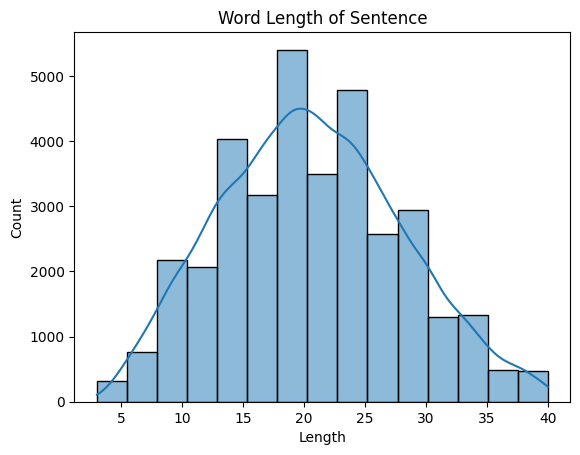

In [7]:
len_list = [len(x.split()) for x in data_train['Preprocess_Question']]
sns.histplot(len_list, kde=True, bins=15)
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Word Length of Sentence');

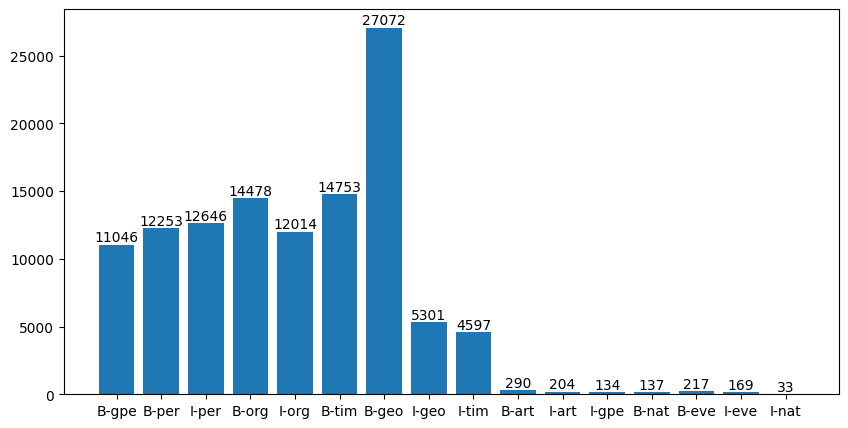

In [8]:
from collections import Counter

list_label = [x for y in data_train.Target for x in y.split()]
list_label = [x for x in list_label if x != 'O']

element_counts = Counter(list_label)
elements, counts = zip(*element_counts.items())

plt.figure(figsize=(10, 5))
plt.bar(elements, counts)

for i in range(len(elements)):
    plt.text(elements[i], counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()

In [9]:
def plot_square_area(label, threshold=100):
  
    label_dict = {}

    for sent in data_train.input:
        for word in sent:
            if word[2] == label:
                if word[0] in label_dict:
                    label_dict[word[0]] +=1
                else:
                    label_dict[word[0]] =1 

    threshold = threshold
    filtered_data = {k: v for k, v in label_dict.items() if v > threshold}

    categories = list(filtered_data.keys())
    values = list(filtered_data.values())

    total = sum(values)
    normalized_values = [(v / total) * 100 for v in values]
    colors = [plt.cm.tab20c(random.random()) for _ in range(len(categories))]

    # Plot the proportional square area chart
    plt.figure(figsize=(8, 6))
    squarify.plot(sizes=normalized_values, label=categories, color=colors, alpha=0.7)
    plt.axis('off')  
    plt.title(f'Proportional Square Area Chart of {label} (Values > {threshold})')
    plt.show()

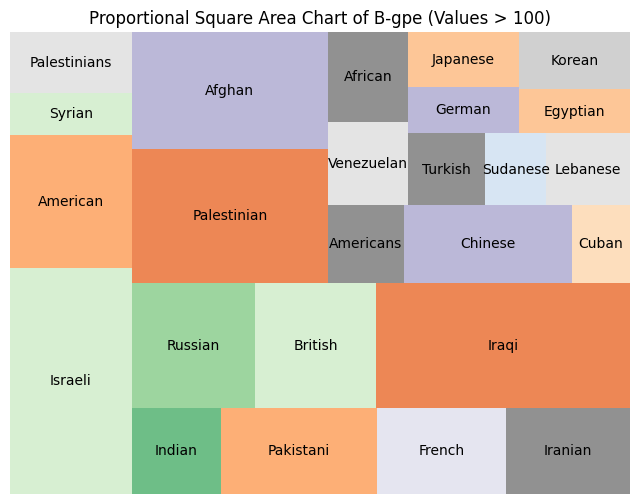

In [10]:
plot_square_area('B-gpe')

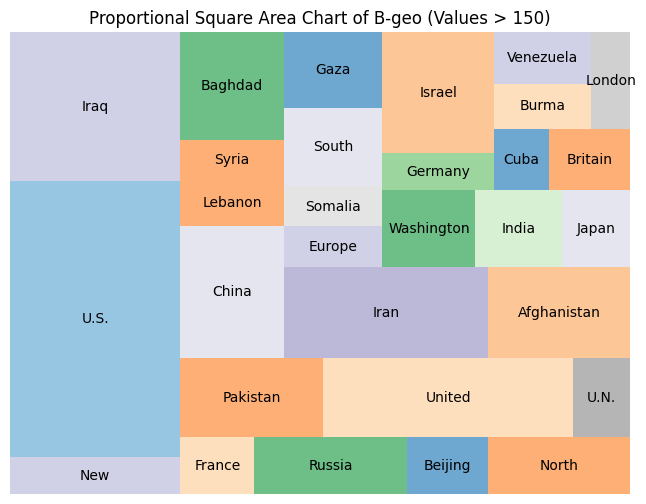

In [11]:
plot_square_area('B-geo', threshold=150)

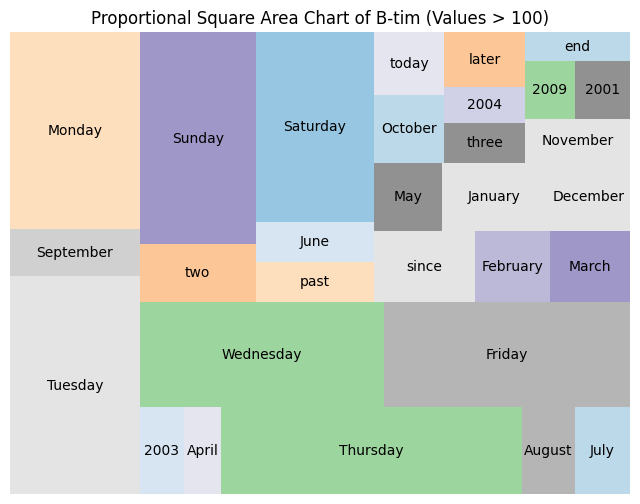

In [12]:
plot_square_area('B-tim')

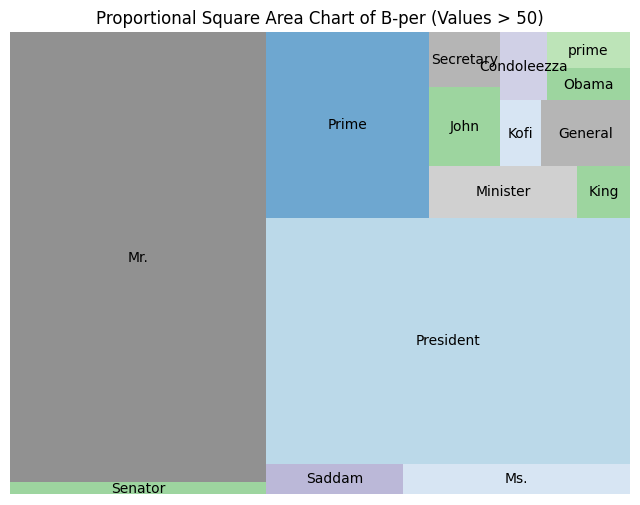

In [13]:
plot_square_area('B-per', threshold=50)

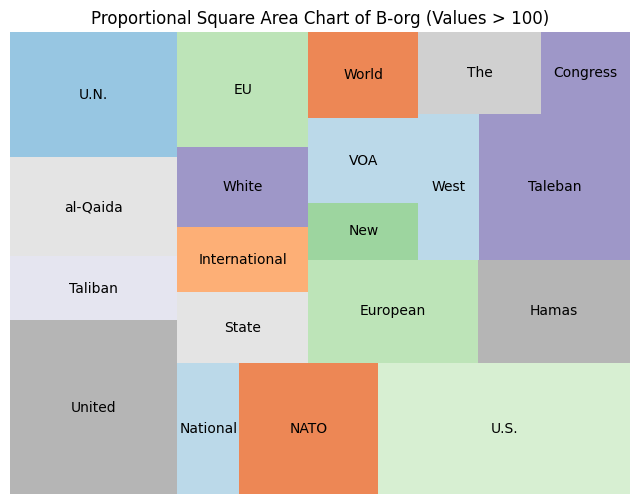

In [14]:
plot_square_area('B-org')

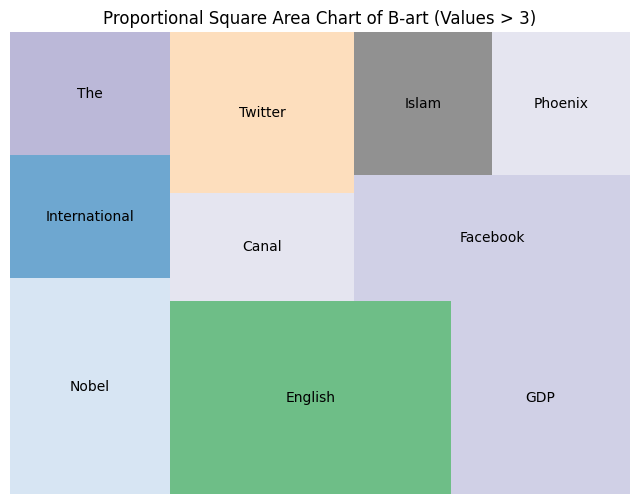

In [19]:
plot_square_area('B-art', threshold=3)

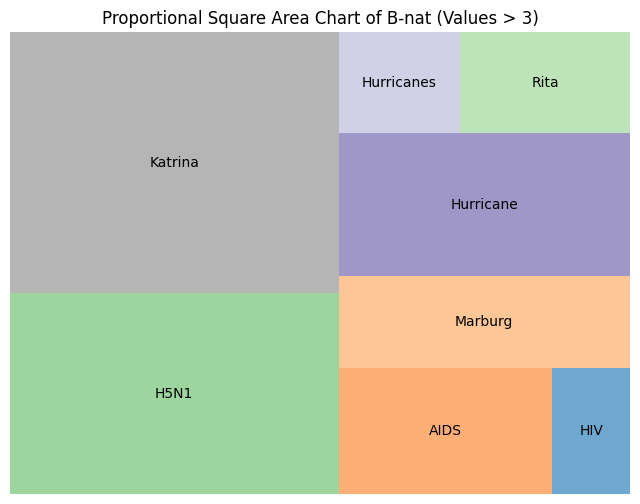

In [20]:
plot_square_area('B-nat', threshold=3)

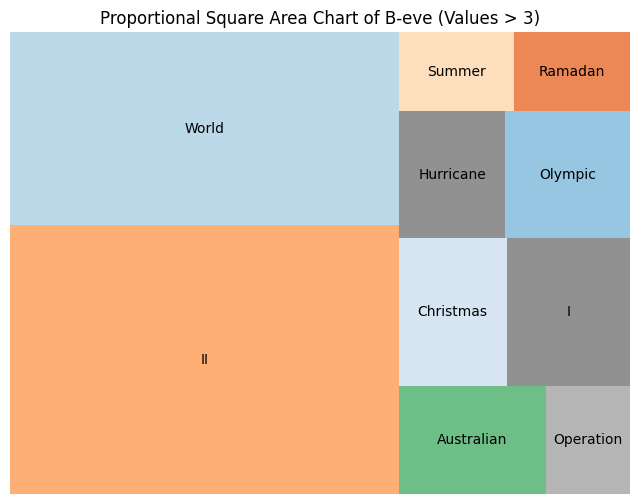

In [21]:
plot_square_area('B-eve', threshold=3)